In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d
plt.rc('font', family='serif')
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [2]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))
print(df_pions.shape)

train_x, train_y = cf.data_normaliser(df_pions[:-1000,:-1]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:-1]), df_pions[-1000:,-1]
opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.881, beta_2= 0.99)


(100000, 17)


In [3]:
def training_data_point_tester(points_array, repeats):

    no_point  = points_array.shape[0]
    min_mape = np.zeros((no_point,repeats))
    is_last_val_bool = np.zeros_like(points_array)
    for i in range(no_point):
        print(points_array[i], 'Training Points')
        last_val_bool = 0
        for j in range(repeats):
            df = pd.DataFrame(cf.trained_network(train_x[:points_array[i]],train_y[:points_array[i]],val_x,val_y,[512,512], optimizer= opt, verbose= 0,epochs = 100, batch_size= 256 ).history)
            val_mape_ar_smoothed = cf.exponetial_smoothing(np.array(df['val_mean_absolute_percentage_error']),0.4)
            loss_ar_smoothed = cf.exponetial_smoothing(np.array(df['loss']),0.4)
            min_mape[i,j] = np.min(val_mape_ar_smoothed)
            if cf.neg_grad_tester(val_mape_ar_smoothed,loss_ar_smoothed):
                last_val_bool +=1
                print('Negative Grad Identified')
            else:
                pass
        if last_val_bool >= repeats/4:
            is_last_val_bool[i] = 1
        else:
            is_last_val_bool[i] = 0
    return min_mape, is_last_val_bool

In [8]:
points = np.logspace(1,5,20,dtype= int)
#min_mape, is_last_val_bool = training_data_point_tester(points,10)

In [5]:
print(np.where(min_mape == np.min(min_mape)))
print((min_mape))


(array([19]), array([6]))
[[116.29659548  96.21745339  95.87369861 154.44139971 119.39015619
  114.32690275  91.67759733 106.9351355  163.95879067  87.58325035]
 [ 73.85659988  88.65202047  86.09864241  89.09238293  89.7157276
   77.32044994  92.28568226  97.06366666  89.38635496  88.53509259]
 [ 95.25430363  70.97528648  94.86257556  71.66154772  72.01334777
   74.47993489  73.58168304  67.98703023  65.90522728  74.20503043]
 [ 73.881325    69.21046062  68.0387039   68.79238471  64.21070936
   77.20544092  76.57035344  70.42784552  67.09938506  65.90343587]
 [ 60.1258713   65.83416283  64.92359627  65.61203384  70.55530245
   71.17016914  66.03453382  74.80060759  73.08607605  64.78304429]
 [ 65.17373092  65.86749253  54.70458087  64.72287364  61.68960027
   64.70247522  61.60291659  65.82752484  65.85884104  63.16183088]
 [ 65.80887282  65.85963743  65.9215667   53.5413003   51.2482325
   65.79799625  53.44257949  65.85988699  65.83640022  65.86541584]
 [ 41.58645755  41.88362707  38

In [5]:
#np.savetxt('./training_datapoints.csv',min_mape,delimiter=',')
#np.savetxt('./training_datapoints_bool.csv',is_last_val_bool,delimiter=',')
min_mape = np.loadtxt('Hyperparam_Testing/Testing_Notebooks/Testing_Data/xtrain/training_datapoints.csv',delimiter= ',')
is_last_val_bool = np.loadtxt('Hyperparam_Testing/Testing_Notebooks/Testing_Data/xtrain/training_datapoints_bool.csv',delimiter= ',')
print(is_last_val_bool.shape)
def return_not_convergerd(x,z,bools): 
    if bools.shape != z.shape:
        print('wrong size input')
    indecies = np.where(z*bools != 0)
 
    unconverged_z = []
    unconverged_x =[]
    for i in range(len(indecies)):
        print(indecies[i])
        unconverged_z.append(z[(indecies[i])])
        unconverged_x.append(x[(indecies[i])])
    return unconverged_x  , unconverged_z

(20,)


In [9]:
def clean_min_mape(min_mape):
    orig_min = min_mape.copy()
    mean_min_mape = np.mean(min_mape,axis =1 )
    mean_min_mape_array = (np.ones_like(min_mape).transpose()*mean_min_mape).transpose()
    std = np.std(min_mape,axis = 1)
    mean_plus_1_sigma = mean_min_mape+std
    mean_plus_1_sigma_array = (np.ones_like(min_mape).transpose()*mean_plus_1_sigma).transpose()
    #print(mean_plus_1_sigma_array)
    index = np.where(min_mape> mean_plus_1_sigma_array)
    min_mape[index] = mean_min_mape_array[index]

    return np.vstack((orig_min[:10,:],min_mape[10:,:]))
    
cleaned_min_mape = clean_min_mape(min_mape)
print(cleaned_min_mape)

[[102.95066639  96.21745339  95.87369861 106.86534351 106.86534351
  102.95066639  91.67759733 106.9351355  106.86534351  87.58325035]
 [ 73.85659988  88.65202047  86.09864241  89.09238293  89.7157276
   77.32044994  86.17052694  86.76231635  89.38635496  88.53509259]
 [ 72.32336908  70.97528648  72.32336908  71.66154772  72.01334777
   71.5455826   73.58168304  67.98703023  65.90522728  71.5455826 ]
 [ 68.8744595   69.21046062  68.0387039   68.79238471  64.21070936
   68.8744595   68.8744595   68.03063035  67.09938506  65.90343587]
 [ 60.1258713   65.83416283  64.92359627  65.61203384  66.85564269
   66.85564269  66.03453382  66.85564269  66.85564269  64.78304429]
 [ 65.17373092  65.86749253  54.70458087  64.72287364  61.68960027
   64.70247522  61.60291659  65.82752484  65.85884104  63.16183088]
 [ 65.80887282  65.85963743  65.9215667   53.5413003   51.2482325
   65.79799625  53.44257949  65.85988699  65.83640022  65.86541584]
 [ 41.58645755  41.88362707  38.83215043  39.23548738  41

[0 1 2 3 4 5 6 7 8]


Text(0, 0.5, 'Mean Minimum MAPE')

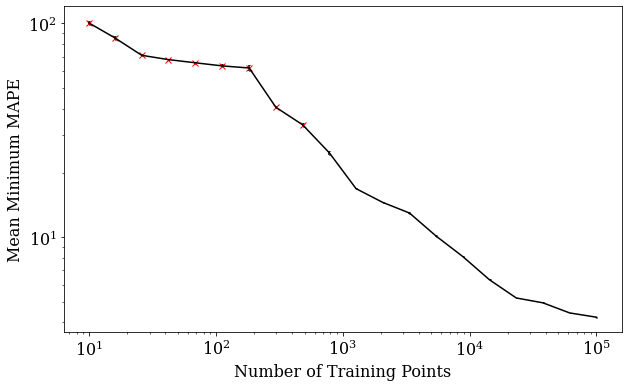

In [19]:


clean_mean_min_mape = np.mean(cleaned_min_mape, axis = 1 )
min_mape_mean = np.mean(min_mape,axis=1)
unclean_ste = np.std(min_mape,axis= 1)/10**0.5
non_c_x,non_c_y = return_not_convergerd(points,clean_mean_min_mape ,is_last_val_bool)
mape_ste = np.std(cleaned_min_mape,axis = 1)/10**0.5
fig,axs = plt.subplots(1,1,figsize = (10,6))
axs.errorbar(points,clean_mean_min_mape,mape_ste,linestyle = '-',c = 'Black', capsize= 0.5)
#axs.errorbar(points,min_mape_mean,unclean_ste,linestyle = '--',c = 'blue', capthick= 0.5, alpha = 0.5)
axs.set_xscale('log')
axs.set_yscale('log')
#axs.set_ylim(0,10)
axs.plot(non_c_x,non_c_y,marker = 'x',c = 'r')
axs.set_xlabel('Number of Training Points')
axs.set_ylabel('Mean Minimum MAPE')

In [20]:
fig.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/training_data_points.png',dpi = 300)